In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Los Angeles Crimes Data 2020-2023

### Data Preparation

In [3]:
df = pd.read_csv('/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.shape

(757141, 28)

In [5]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
# Selecting the only columns we need

df = df[['DR_NO', 'Date Rptd', 
        'DATE OCC', 'TIME OCC',
        #'AREA', 
        'AREA NAME',
        #'Rpt Dist No', 'Part 1-2', 'Crm Cd',
        'Crm Cd Desc', 
        #'Mocodes',
        'Vict Age', 'Vict Sex',
        #'Vict Descent', 
        #'Premis Cd', 
        'Premis Desc',
        #'Weapon Used Cd',
        'Weapon Desc', 
        #'Status',
        'Status Desc', 
        #'Crm Cd 1',
        #'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 
        'LAT',
        'LON']].copy()

In [7]:
# Changing the date and time format

df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], 
                                format='%H%M', 
                                errors='coerce') \
                .dt.time

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [8]:
# Separate Year, Month, and Day Column

df['Year']  = df['DATE OCC'].dt.year
df['Month Number'] = df['DATE OCC'].dt.month
df['Day']   = df['DATE OCC'].dt.day

In [9]:
# Change the numeric months with their proper names

df['Month'] = df['Month Number'].map(lambda x: calendar.month_name[x])
df = df.drop(columns=['Month Number'])

In [10]:
# Handling 0 values in Age Column with data Imputation before we create the Age Group column

average_age = df[df['Vict Age'] > 0]['Vict Age'].mean()

df.loc[df['Vict Age']==0, 'Vict Age'] = average_age

In [11]:
# Changing the Victim Age column to int type

df['Vict Age'] = df['Vict Age'].astype(int)

In [12]:
# Creating the Age Group Column

bins = [0, 20, 50, float('inf')]
age_group = ['0-20', '21-50', '51+']

df['Age Group'] = pd.cut(df['Vict Age'], bins=bins, labels=age_group)

In [13]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,Status Desc,LAT,LON,Year,Day,Month,Age Group
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,22:30:00,Southwest,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,34.0141,-118.2978,2020,8,January,21-50
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,03:30:00,Central,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,34.0459,-118.2545,2020,1,January,21-50
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,12:00:00,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,39,X,POLICE FACILITY,NaN,Adult Arrest,34.0448,-118.2474,2020,13,February,21-50
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,17:30:00,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,34.1685,-118.4019,2020,1,January,51+
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,04:15:00,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,34.2198,-118.4468,2020,1,January,21-50


### Data Cleaning

In [14]:
# Checking is there any null data
df.isnull().any()

DR_NO          False
Date Rptd      False
DATE OCC       False
TIME OCC        True
AREA NAME      False
Crm Cd Desc    False
Vict Age       False
Vict Sex        True
Premis Desc     True
Weapon Desc     True
Status Desc    False
LAT            False
LON            False
Year           False
Day            False
Month          False
Age Group       True
dtype: bool

In [15]:
df['Premis Desc'].isnull().value_counts()

False    756699
True        442
Name: Premis Desc, dtype: int64

In [16]:
df['Vict Sex'].isnull().value_counts()

False    658230
True      98911
Name: Vict Sex, dtype: int64

In [17]:
df['TIME OCC'].isnull().value_counts()

False    740498
True      16643
Name: TIME OCC, dtype: int64

In [18]:
df['Weapon Desc'].isnull().value_counts()

True     494062
False    263079
Name: Weapon Desc, dtype: int64

In [19]:
df['Age Group'].isnull().value_counts()

False    757082
True         59
Name: Age Group, dtype: int64

In [20]:
# Dropping the null premis
null_premis = df['Premis Desc'].isnull()
df = df[~null_premis]

In [21]:
# Dropping the null time
null_time = df['TIME OCC'].isnull()
df = df[~null_time]

In [22]:
# Dropping the null Age
null_age = df['Age Group'].isnull()
df = df[~null_age]

In [23]:
df.duplicated().any()

False

In [24]:
df.shape

(740013, 17)

### Exploring the Data

#### Total Crime Reports per Area

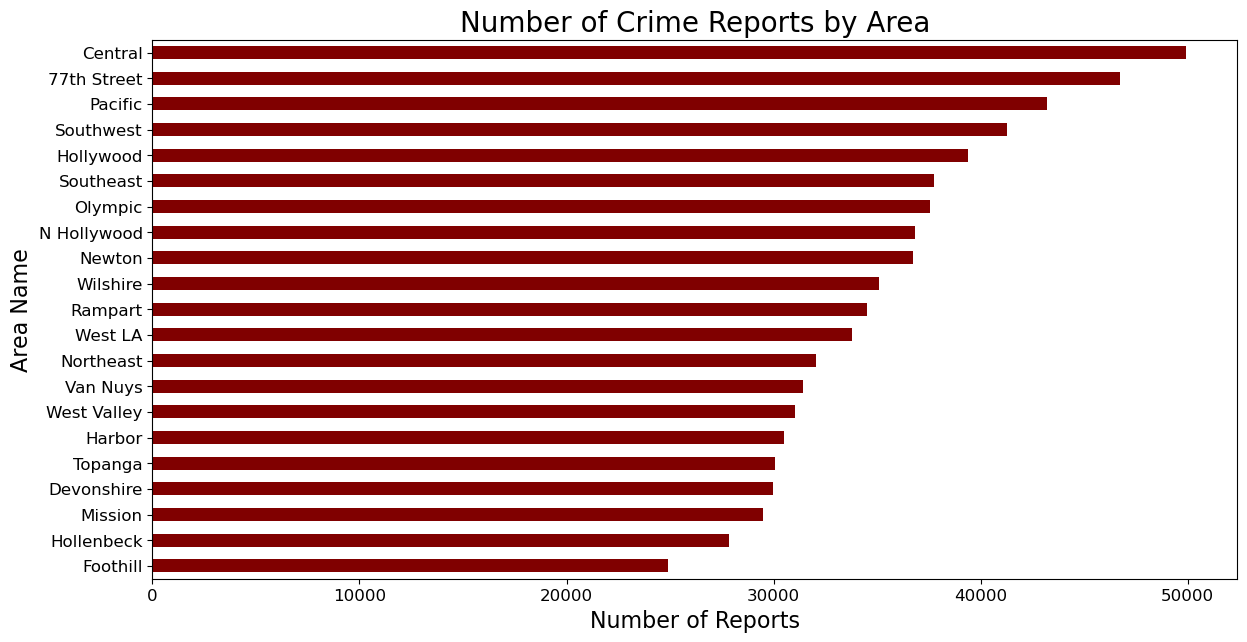

In [25]:
df['AREA NAME'].value_counts() \
               .sort_values(ascending=True) \
               .plot(kind    ='barh',
                     figsize =(14,7),
                     color   ='Maroon')

plt.xlabel('Number of Reports', fontsize=16, color='Black')
plt.ylabel('Area Name', fontsize=16, color='Black')
plt.xticks(fontsize=12, color='Black')
plt.yticks(fontsize=12, color='Black')
plt.title('Number of Crime Reports by Area', fontsize=20)
plt.show()

#### Top 10 Crime Types

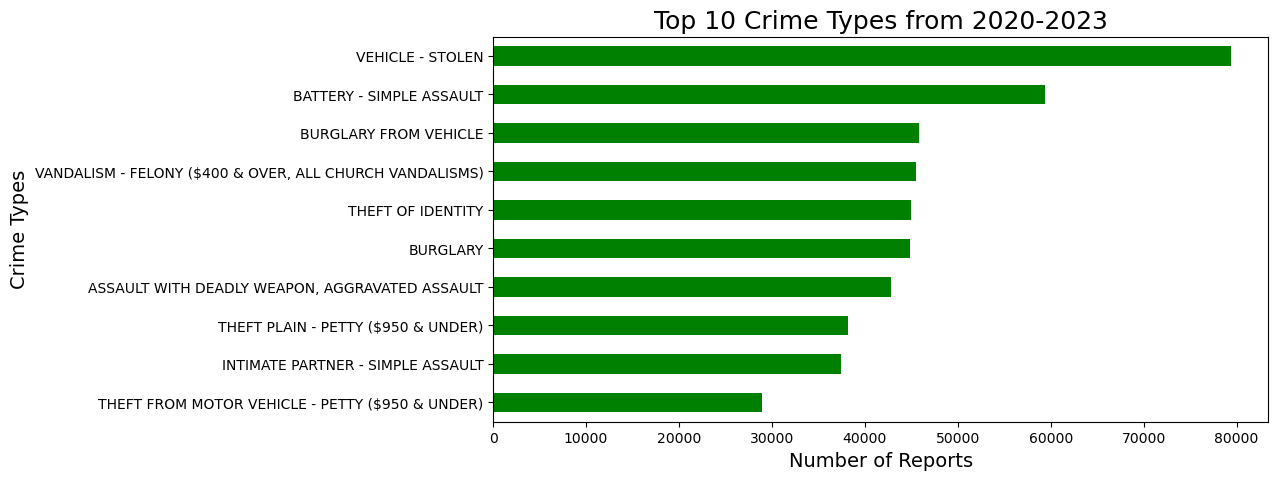

In [26]:
df['Crm Cd Desc'].value_counts() \
                 .sort_values(ascending=True) \
                 .tail(10).plot(kind    = 'barh',
                                figsize = (10,5),
                                color   = 'Green')

plt.ylabel('Crime Types', fontsize=14)
plt.xlabel('Number of Reports', fontsize=14)
plt.title('Top 10 Crime Types from 2020-2023', fontsize=18)
plt.show()

#### Top 10 Most Used Weapon

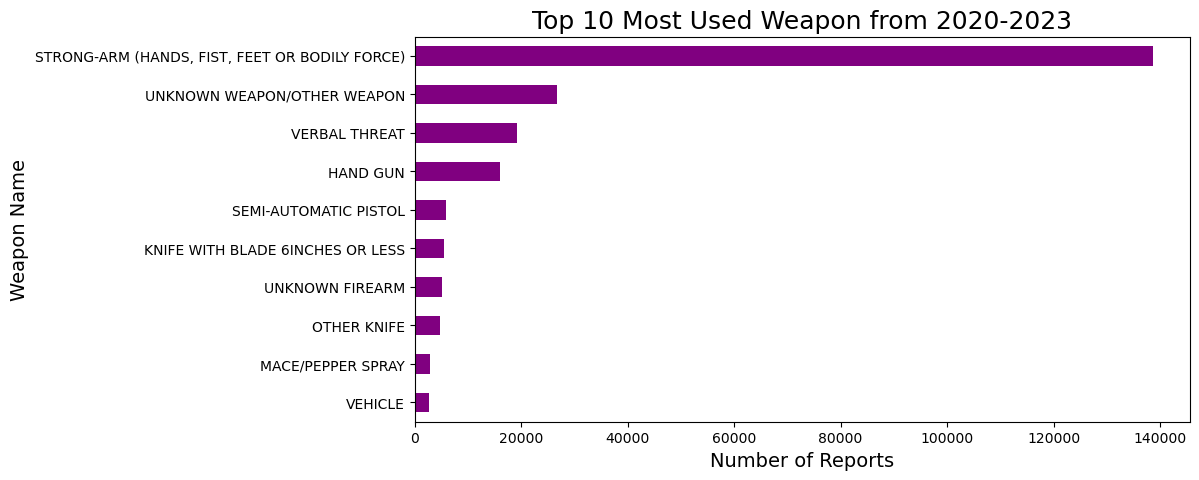

In [27]:
df['Weapon Desc'].value_counts() \
                 .sort_values(ascending=True) \
                 .tail(10).plot(kind    = 'barh',
                                figsize = (10,5),
                                color   = 'Purple')

plt.ylabel('Weapon Name', fontsize=14)
plt.xlabel('Number of Reports', fontsize=14)
plt.title('Top 10 Most Used Weapon from 2020-2023', fontsize=18)
plt.show()

#### Victim Sex Distribution

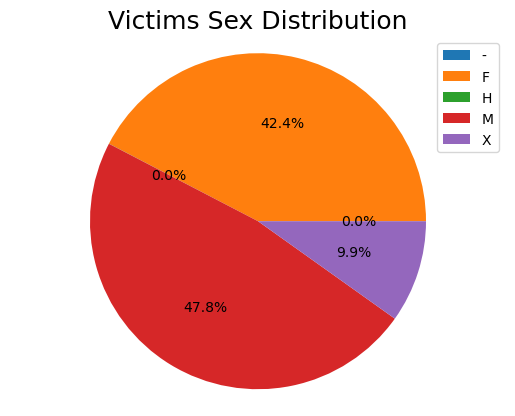

In [28]:
vict_sex = df.groupby('Vict Sex')
sex = vict_sex.size().reset_index(name='Sex_Count')

plt.pie(sex['Sex_Count'], labels=None,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Victims Sex Distribution', fontsize=18)
plt.legend(sex['Vict Sex'], loc='upper right')
plt.show()

#### Victim Age Groups Distribution

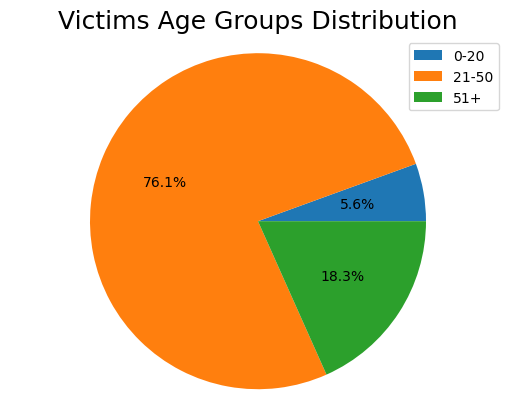

In [29]:
vict_age = df.groupby('Age Group')
age = vict_age.size().reset_index(name='Population')

plt.pie(age['Population'], labels=None,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Victims Age Groups Distribution', fontsize=18)
plt.legend(age['Age Group'], loc='upper right')
plt.show()

#### Time Series On When The Crimes Have Happened

In [30]:
time = df.groupby('TIME OCC')
time_series = time.size().reset_index(name='Number of Crimes')

In [31]:
time_series['TIME OCC'] = pd.to_datetime(time_series['TIME OCC'], format='%H:%M:%S')
time_series['Hours'] = time_series['TIME OCC'].dt.hour
time_series['Minute'] = time_series['TIME OCC'].dt.minute

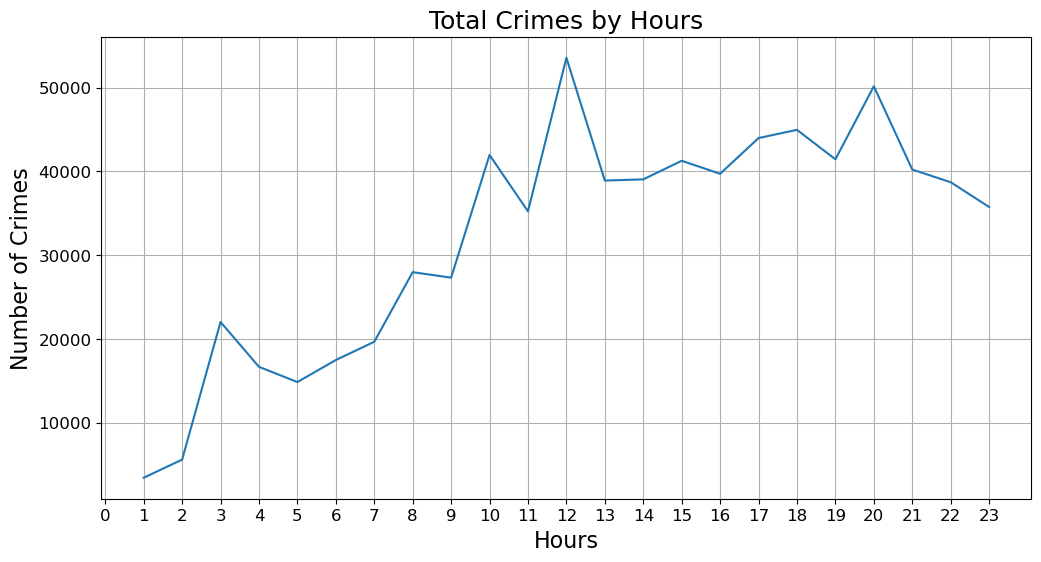

In [32]:
hourly_crimes = time_series.groupby('Hours')['Number of Crimes'].sum().reset_index(name='Total Crimes')

plt.figure(figsize=(12,6))
plt.plot(hourly_crimes['Hours'], 
         hourly_crimes['Total Crimes'])

plt.grid(True)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Crimes by Hours', fontsize=18)
plt.show()

#### Top 10 Location Types

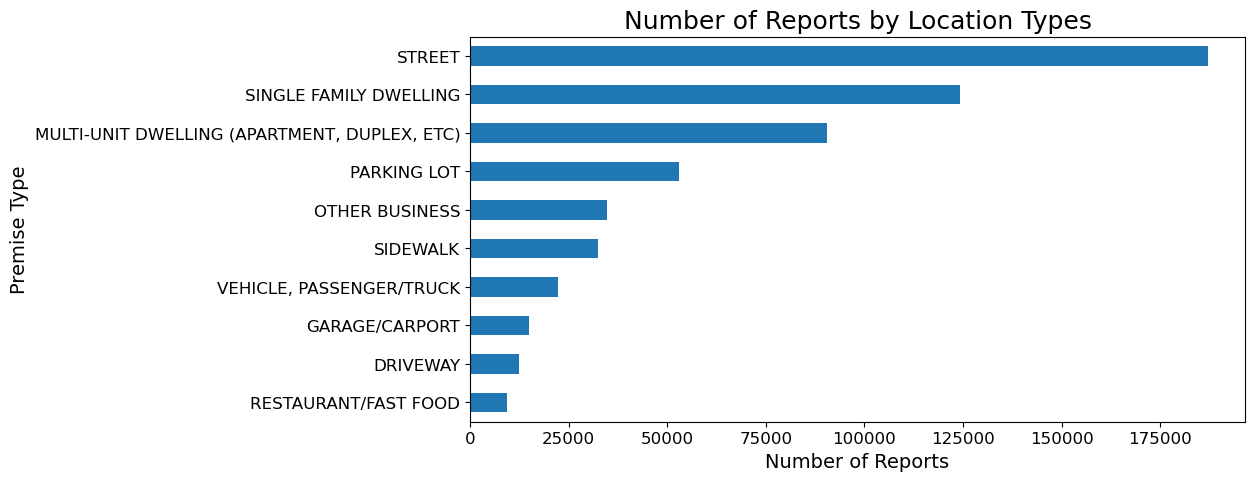

In [33]:
df['Premis Desc'].value_counts() \
                 .sort_values(ascending=True) \
                 .tail(10).plot(kind='barh', figsize=(10,5))

plt.xlabel ('Number of Reports', fontsize=14)
plt.ylabel ('Premise Type', fontsize=14)
plt.xticks (fontsize=12)
plt.yticks (fontsize=12)
plt.title  ('Number of Reports by Location Types', fontsize=18)
plt.show()

#### Status Distribution

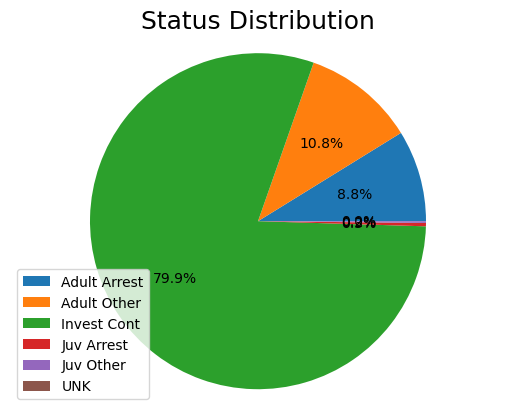

In [34]:
status = df.groupby('Status Desc')
stat = status.size().reset_index(name='Count of Status')

plt.pie(stat['Count of Status'], labels=None,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Status Distribution', fontsize=18)
plt.legend(stat['Status Desc'], loc='lower left')
plt.show()

### Analyzing The Trend

#### Crime Trends for Each Years

In [35]:
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

grouped_data = df.groupby(['Year', 'Month'])

total_data = grouped_data.size().reset_index(name='Total Crime Reports')

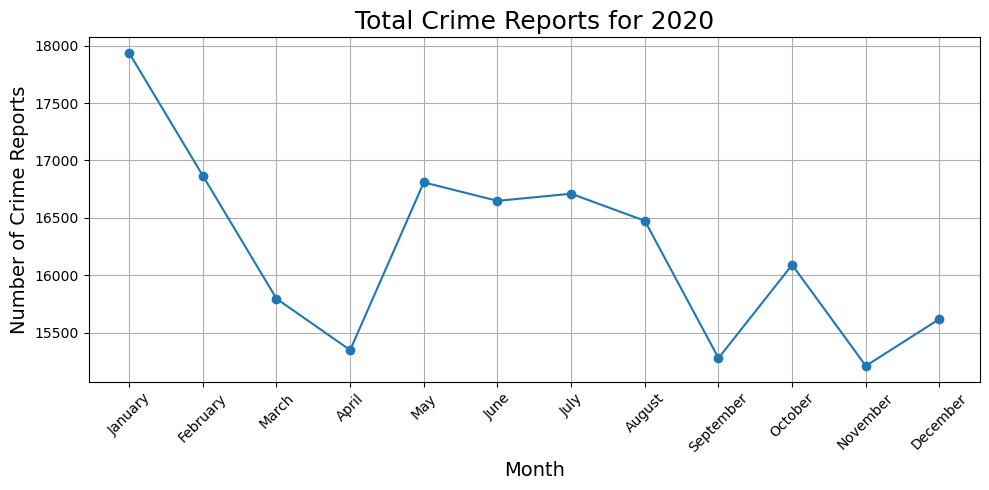

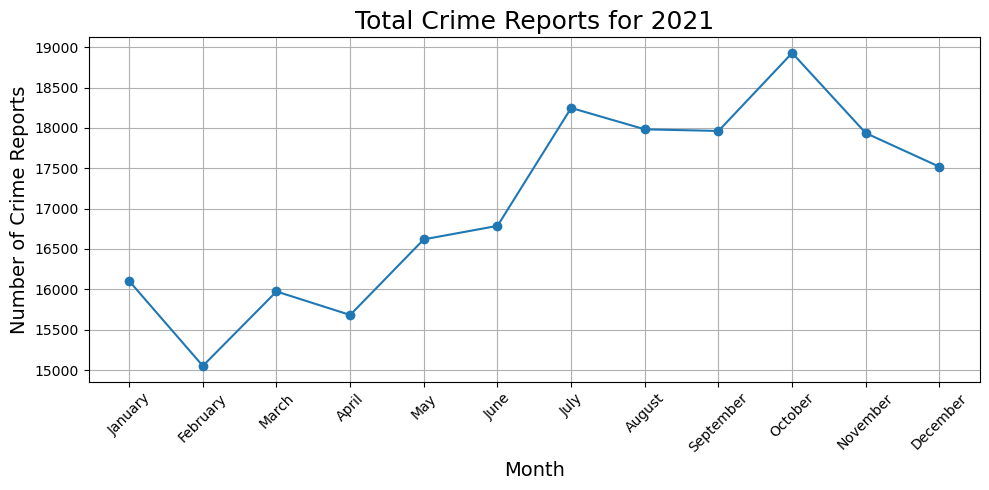

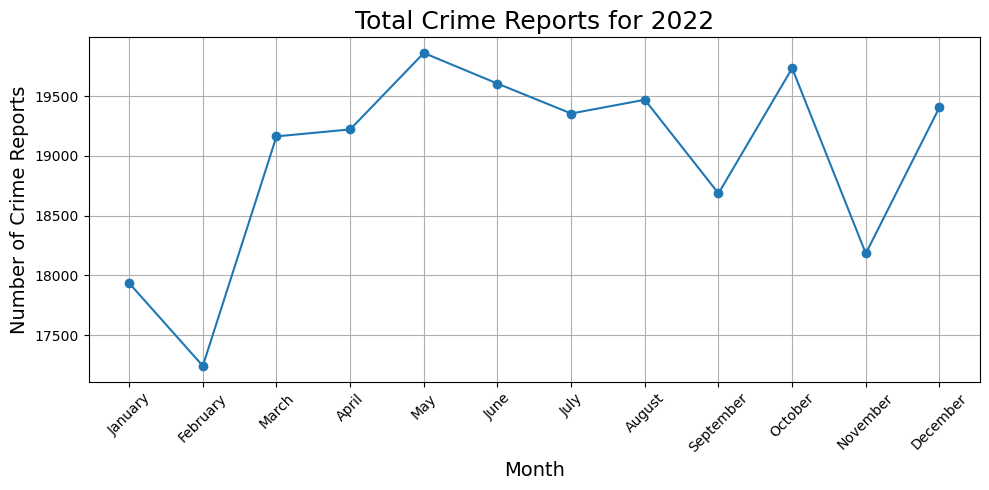

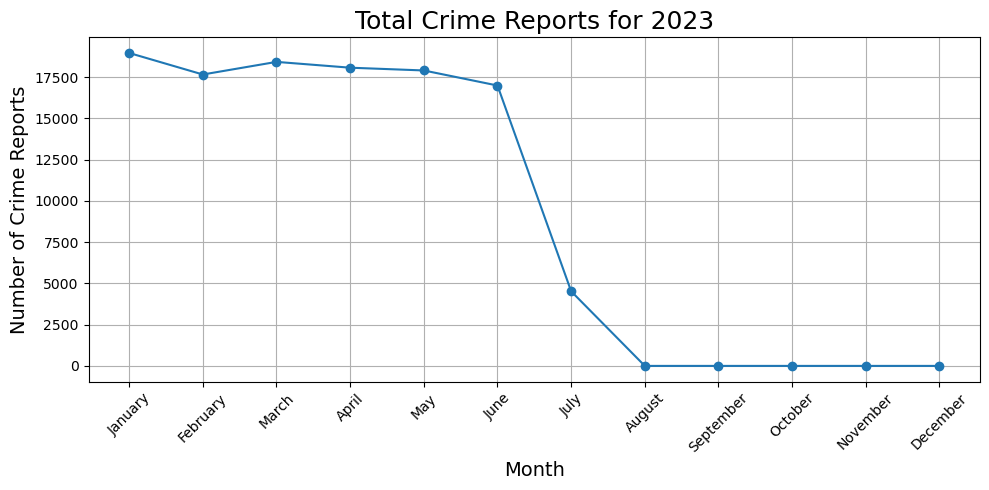

In [36]:
for year in total_data['Year'].unique():
    data_for_year = total_data[total_data['Year'] == year]
    
    plt.figure(figsize=(10,5))
    plt.plot(data_for_year['Month'], data_for_year['Total Crime Reports'], marker='o')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Crime Reports', fontsize=14)
    plt.title(f'Total Crime Reports for {year}', fontsize= 18)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Crime Reports per Area for Each Years

In [37]:
area_crime = df.groupby(['Year', 'AREA NAME'])
c_area_crime = area_crime.size().reset_index(name='Counts')

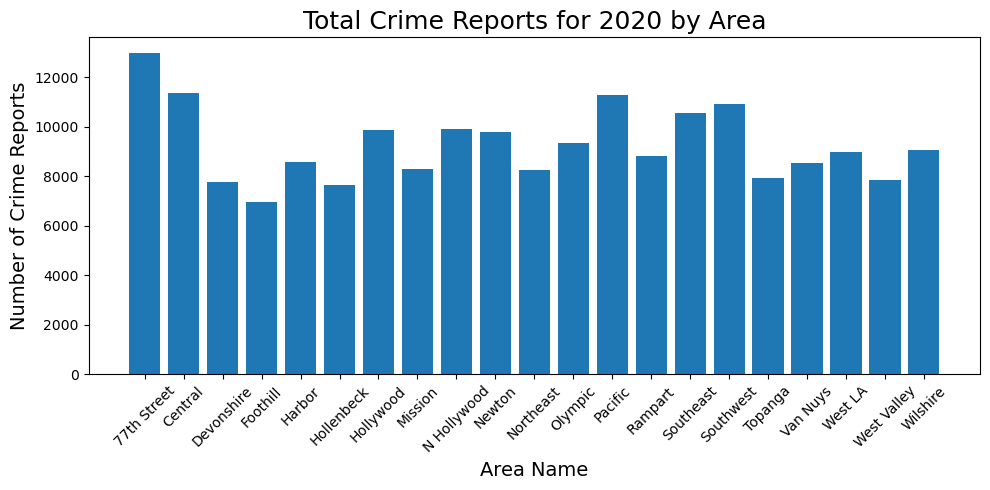

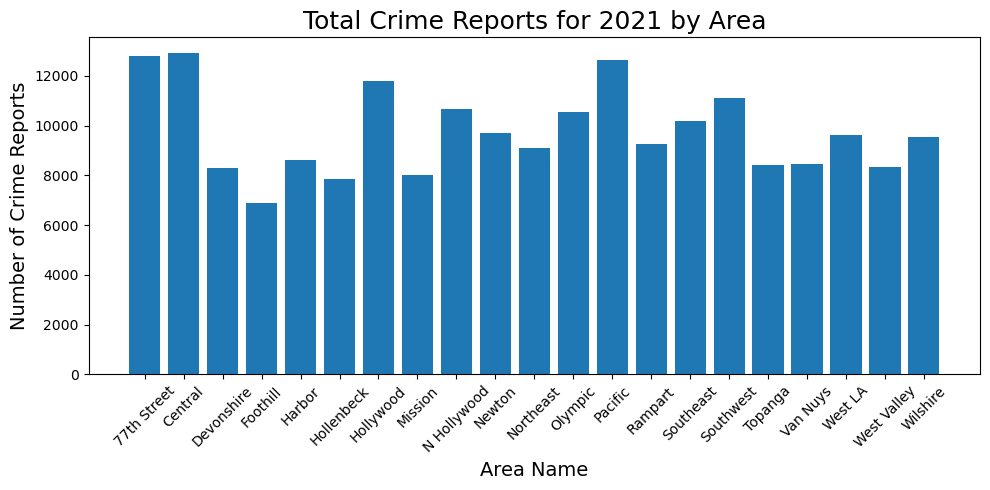

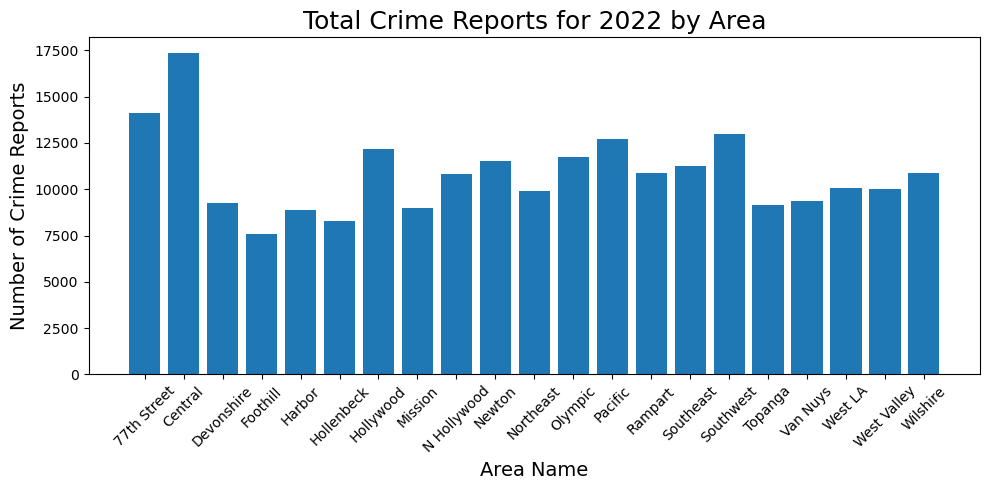

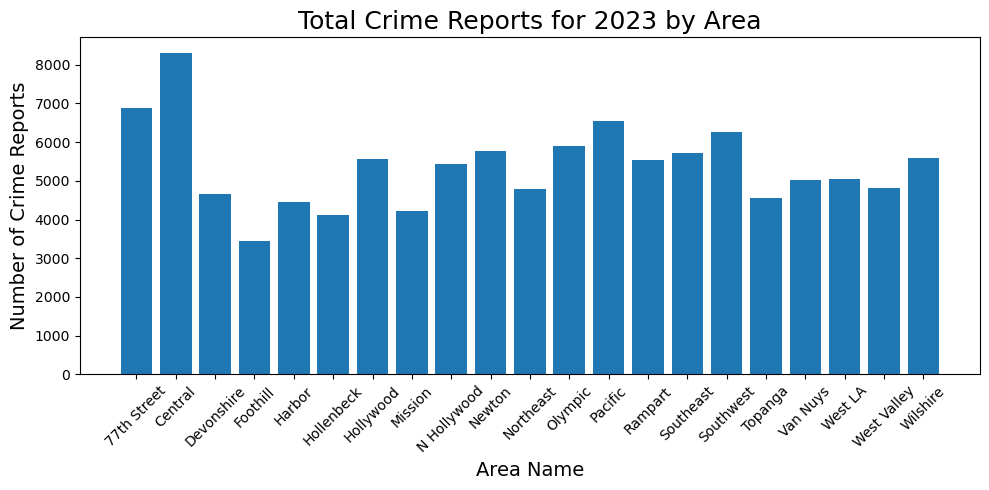

In [38]:
for year in c_area_crime['Year'].unique():
    crime_for_year = c_area_crime[c_area_crime['Year'] == year]
    
    plt.figure(figsize=(10,5))
    plt.bar(crime_for_year['AREA NAME'], crime_for_year['Counts'])
    plt.xlabel('Area Name', fontsize=14)
    plt.ylabel('Number of Crime Reports', fontsize=14)
    plt.title(f'Total Crime Reports for {year} by Area', fontsize= 18)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [39]:
crime_types = df.groupby(['AREA NAME', 'Crm Cd Desc'])
c_crime_types = crime_types.size().reset_index(name='Counts') \
                           .sort_values(['AREA NAME', 'Counts'], 
                                        ascending=[True, False])

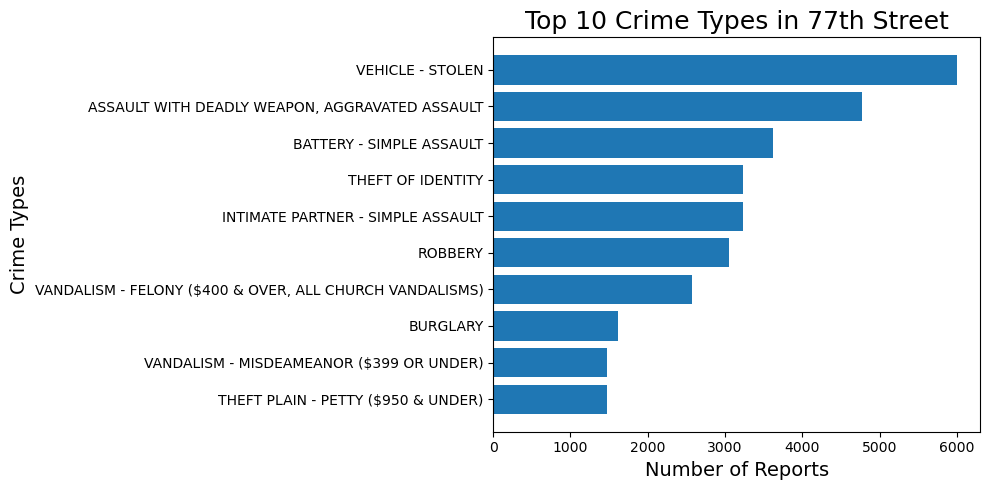

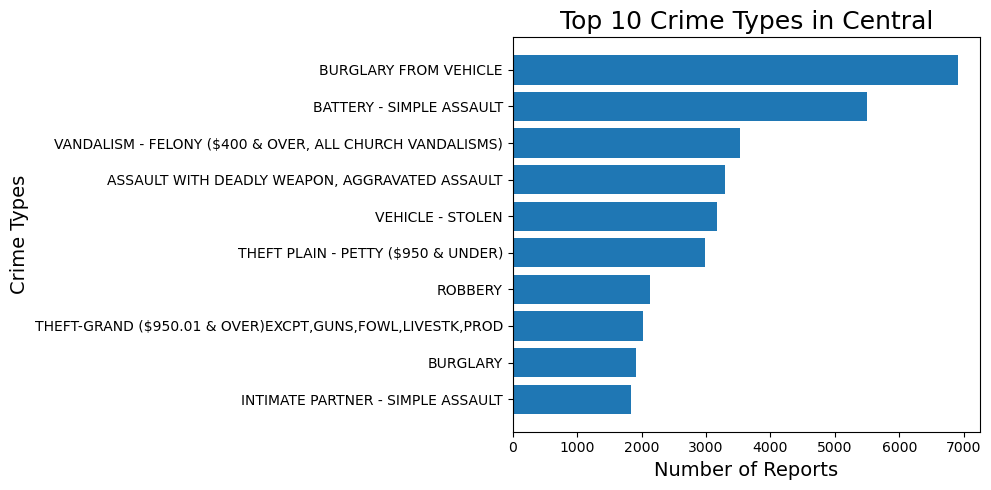

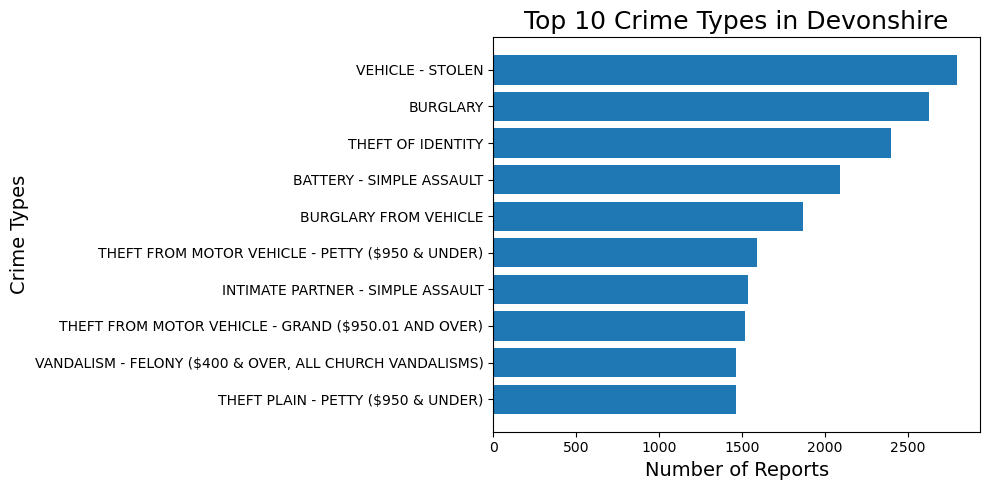

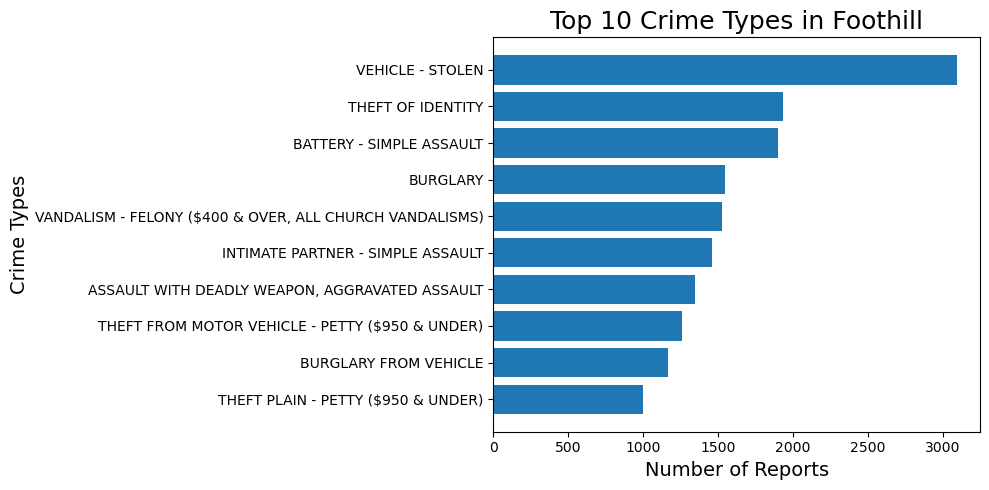

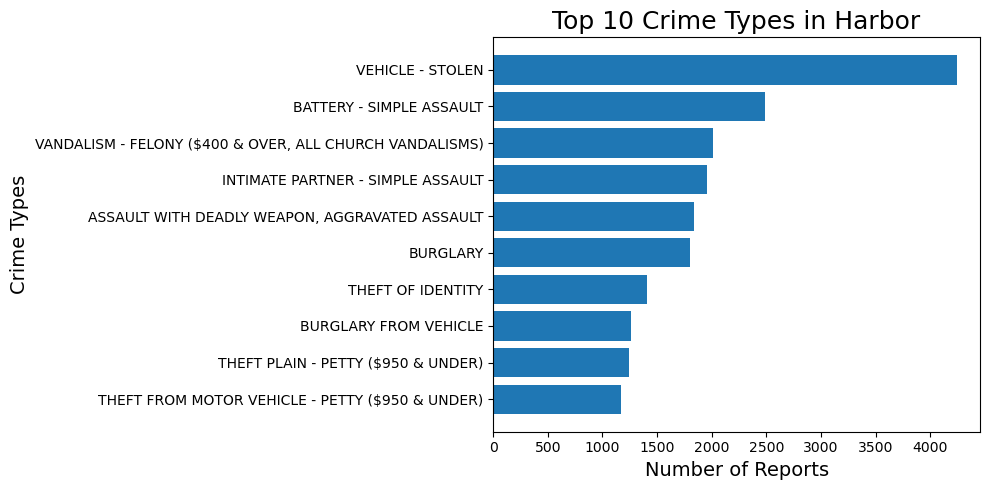

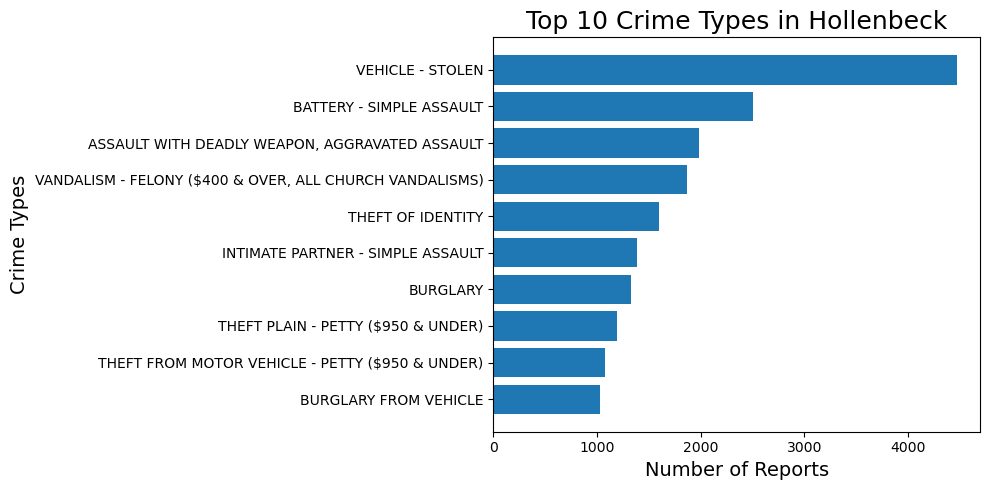

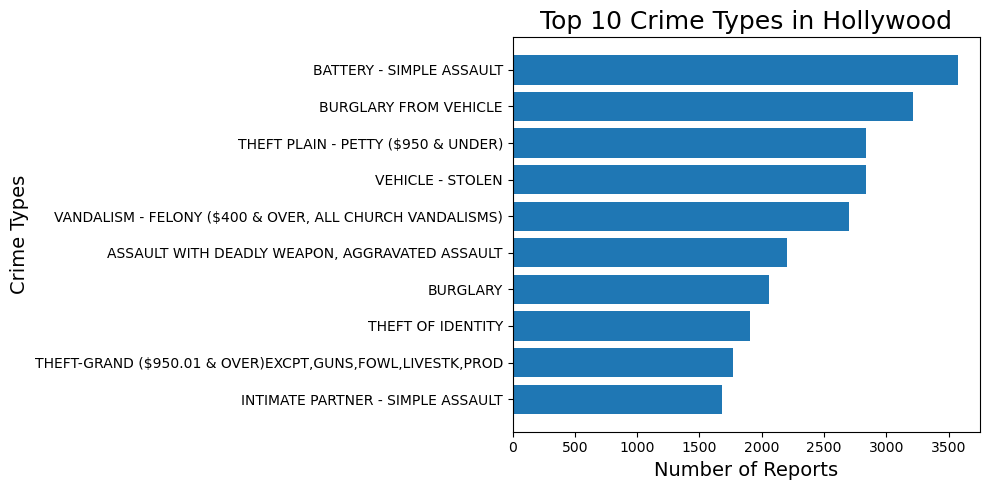

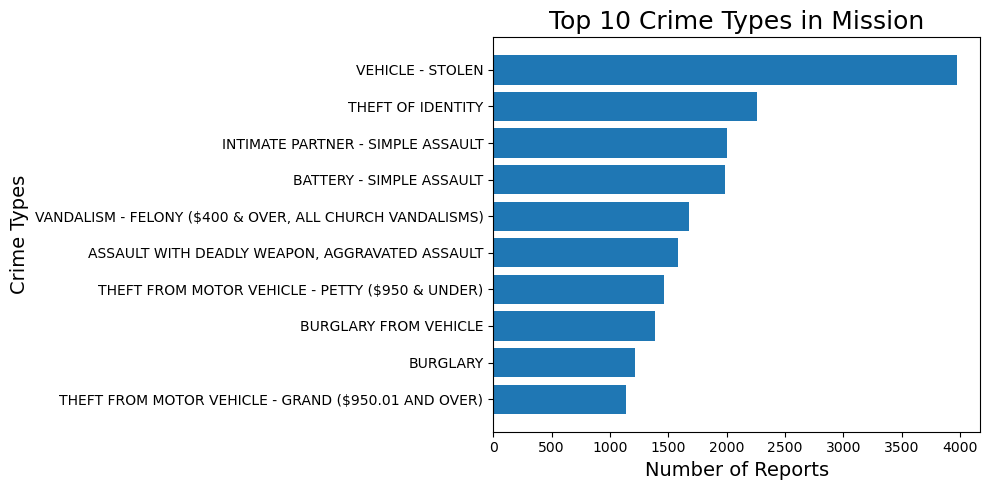

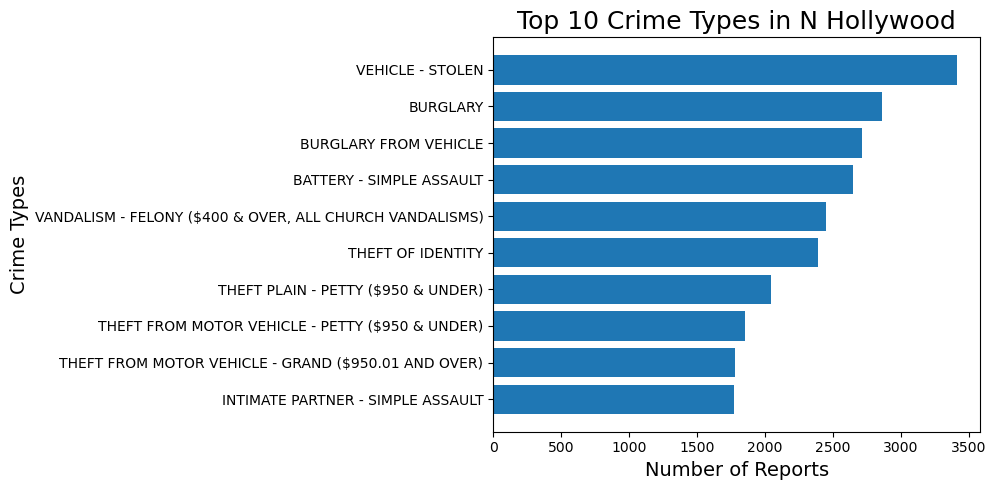

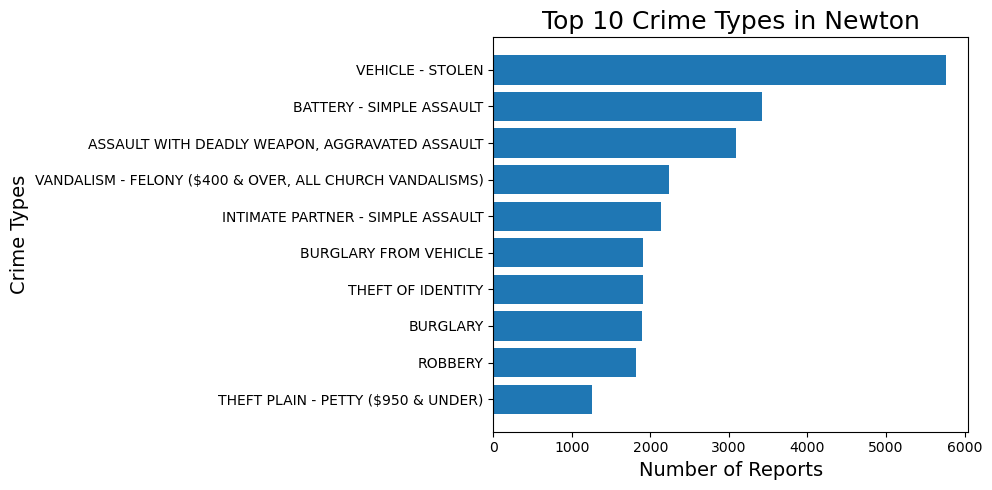

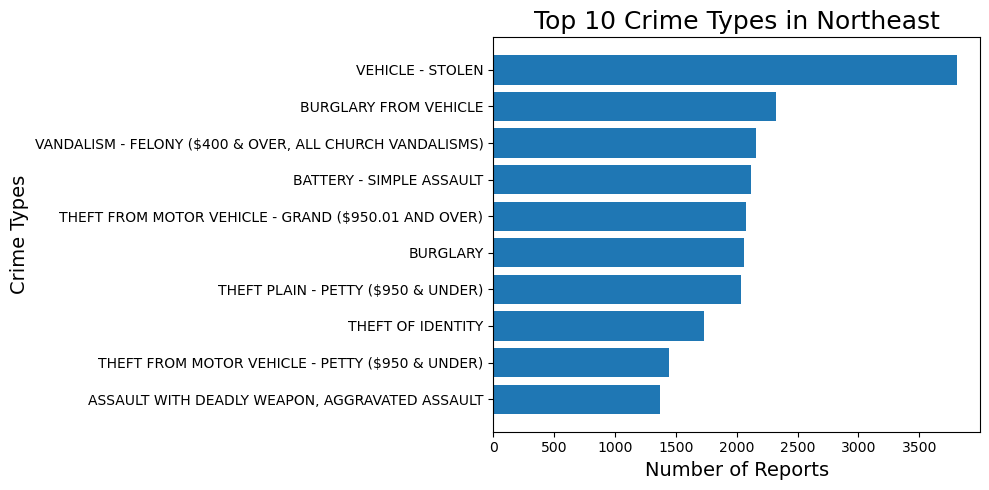

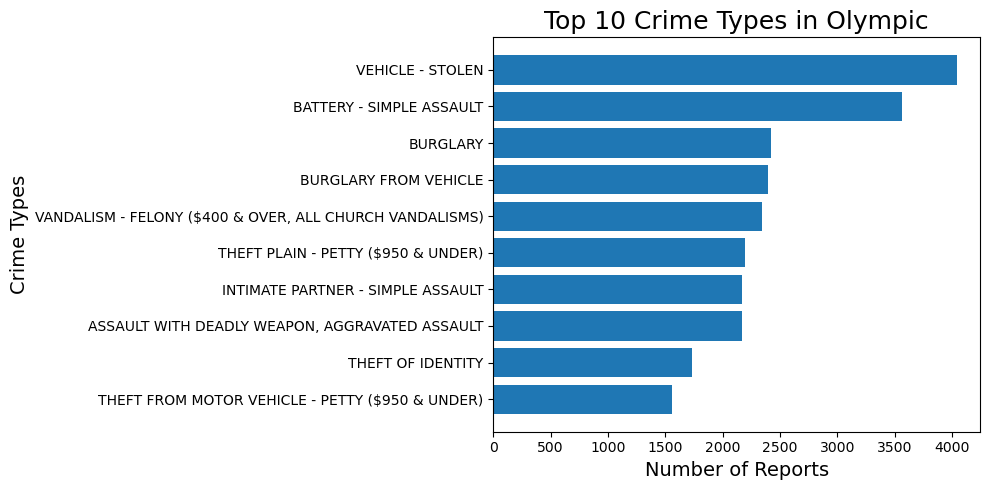

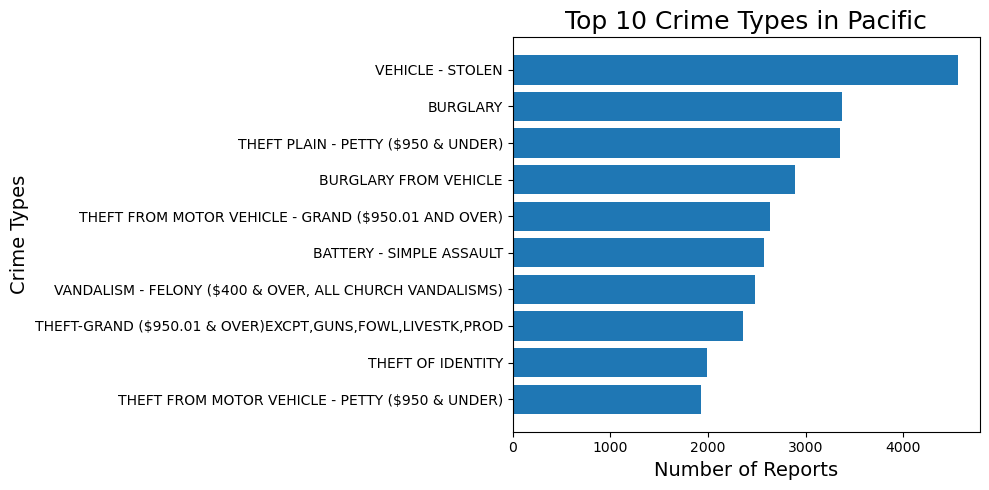

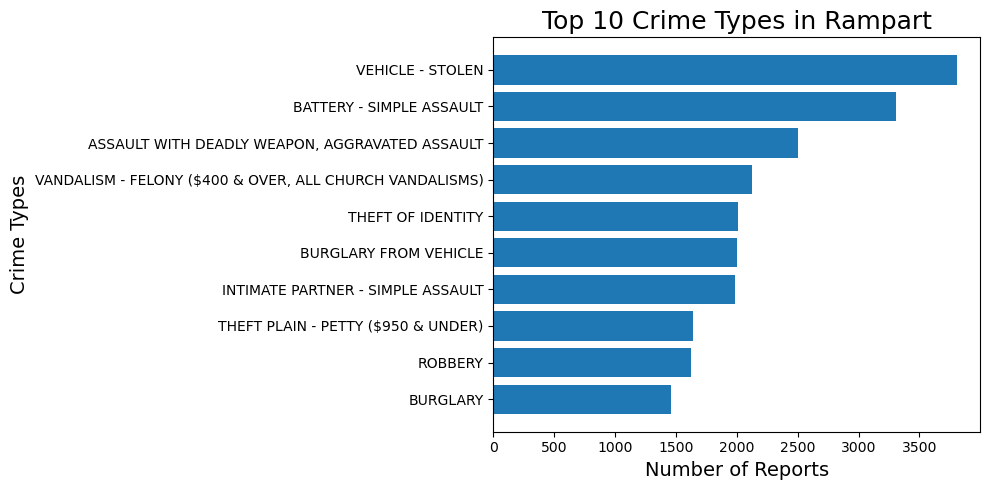

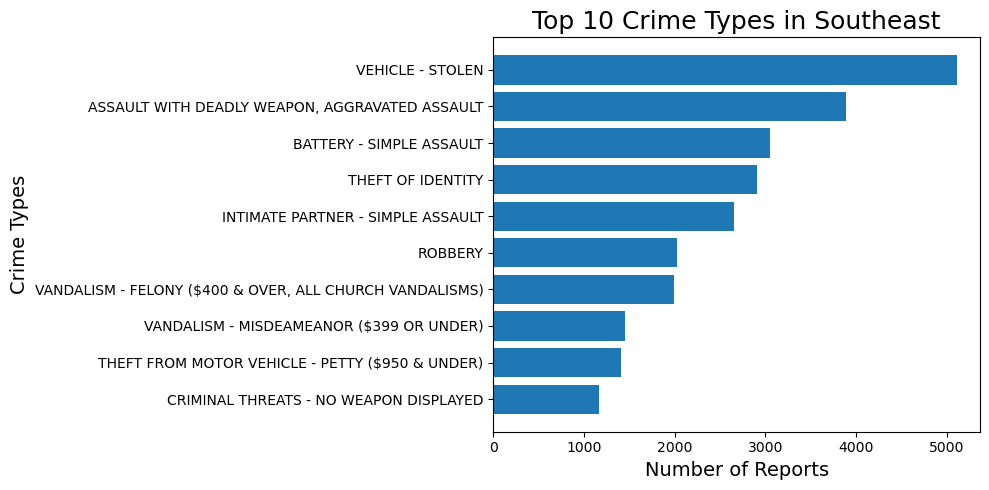

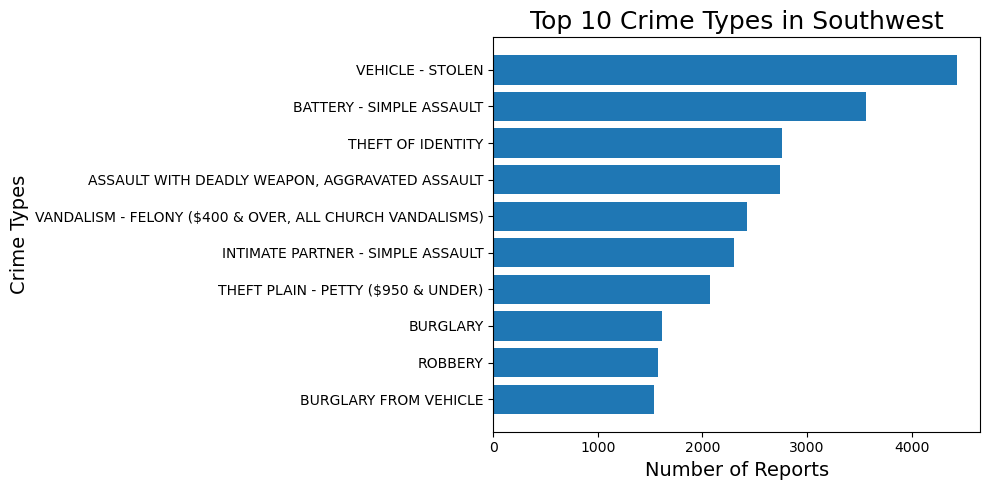

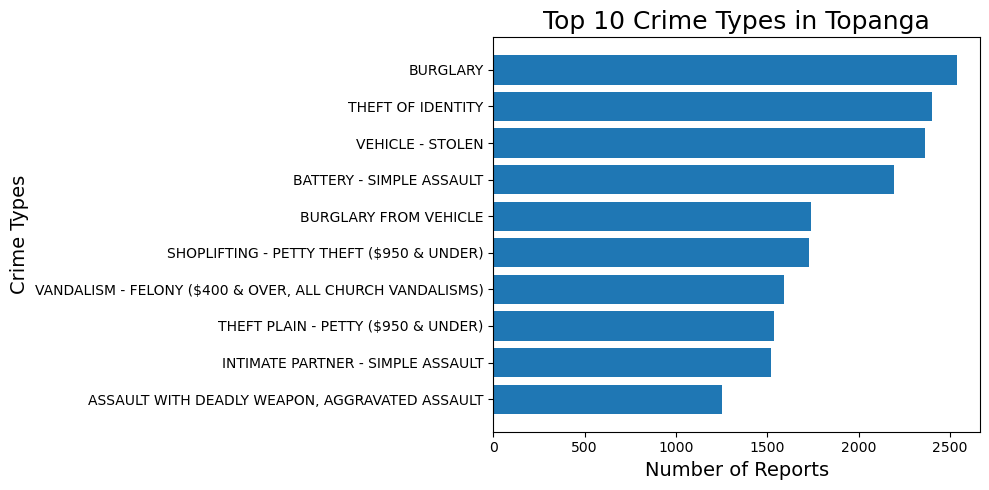

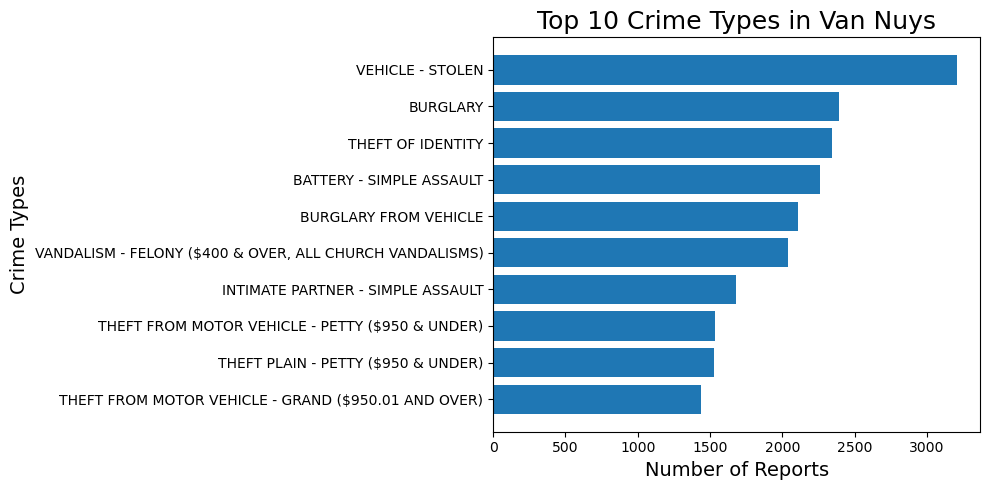

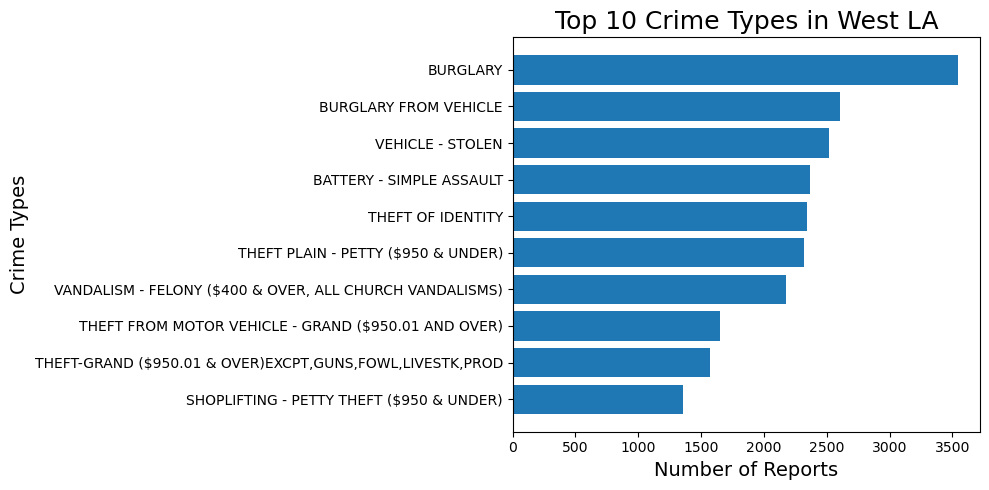

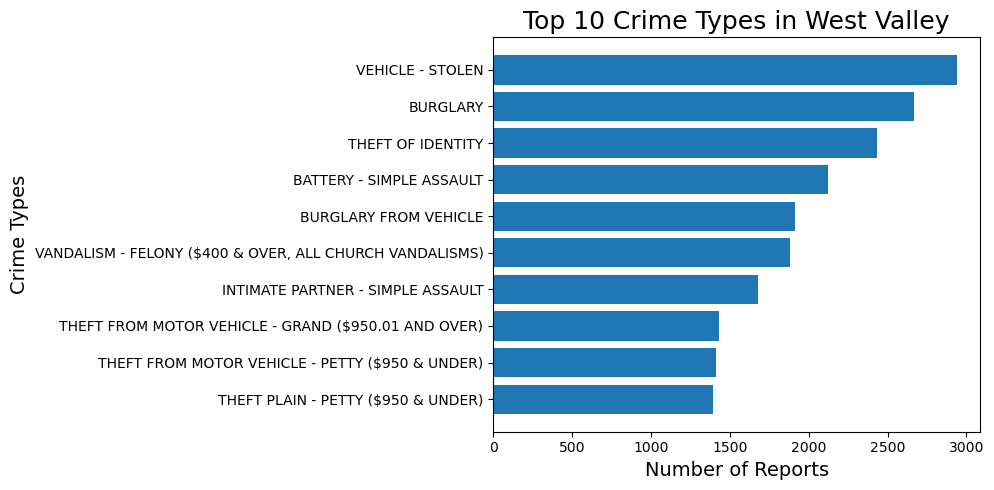

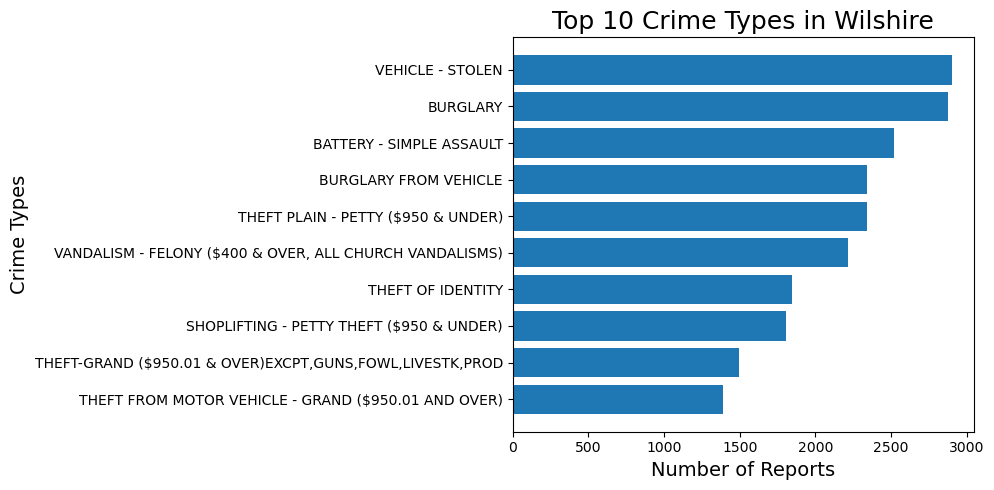

In [40]:
top_crime_area = []

for area in c_crime_types['AREA NAME'].unique():
    top_crime_area.append(c_crime_types[c_crime_types['AREA NAME'] == area] \
                          .sort_values(by='Counts',ascending=True) \
                          .tail(10))
    
for area_data in top_crime_area:
    area_name = area_data['AREA NAME'].iloc[0]
    top_10_crime_types = area_data['Crm Cd Desc']
    counts = area_data['Counts']

    plt.figure(figsize=(10, 5))
    plt.barh(top_10_crime_types, counts)
    plt.xlabel('Number of Reports', fontsize=14)
    plt.ylabel('Crime Types', fontsize=14)
    plt.title(f'Top 10 Crime Types in {area_name}', fontsize=18)
    plt.tight_layout()
    plt.show()